In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
heart = pd.read_csv('heart.csv')

In [ ]:
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.sample(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


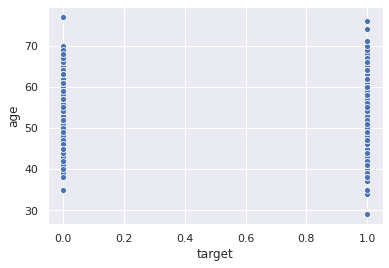

In [ ]:
sns.scatterplot(y='age',x='target',data=heart,)

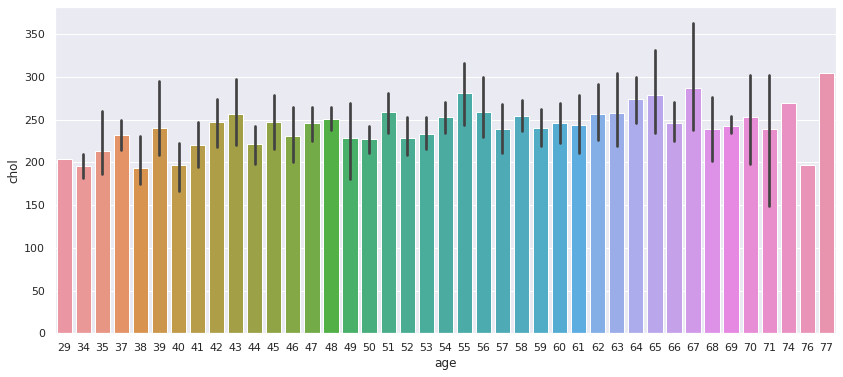

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x='age',y='chol',data=heart)

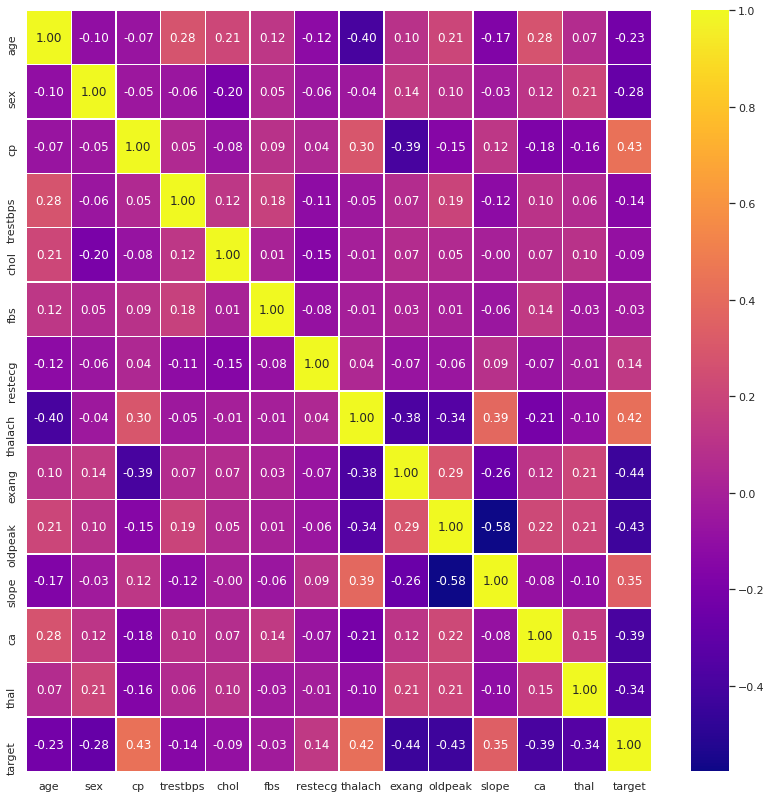

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(heart.corr(),cmap='plasma',annot=True,fmt=".2f",linewidths=0.5)

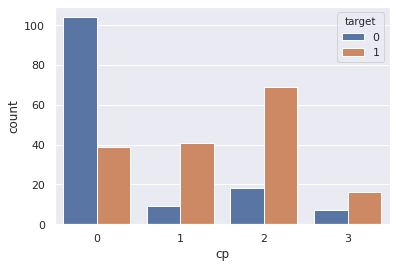

In [ ]:
heart.cp.value_counts()
sns.countplot(x='cp',hue='target',data=heart)

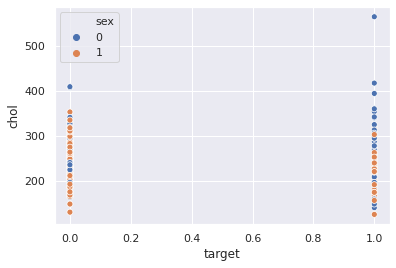

In [ ]:
sns.scatterplot(x='target',y='chol',data=heart,hue='sex')

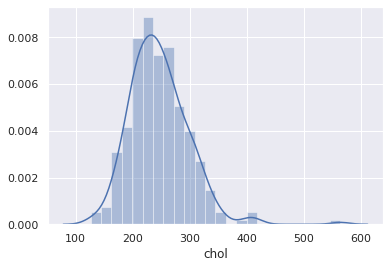

In [ ]:
sns.distplot(a=heart.chol)


[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

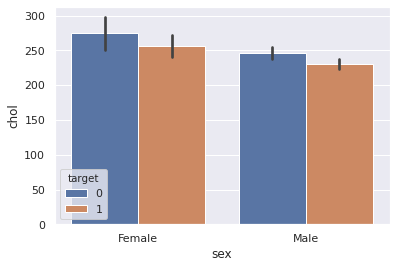

In [ ]:
graph = sns.barplot(data=heart,x='sex',y='chol',hue='target')
graph.set_xticklabels(('Female','Male'))

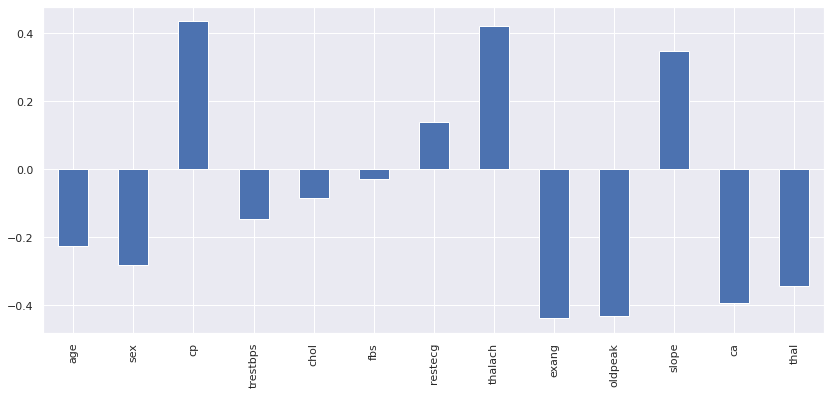

In [ ]:
feature_frame = heart.drop('target',axis=1)
feature_frame.corrwith(heart.target).plot(kind='bar',figsize=(14,6),grid=True)

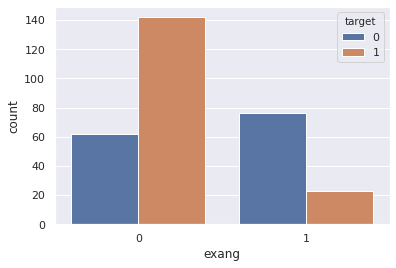

In [ ]:
sns.countplot(x='exang',hue='target',data=heart)

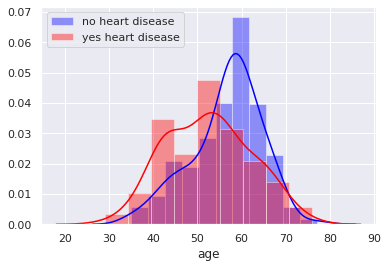

In [ ]:
sns.distplot(a=heart[heart["target"] == 0]['age'],kde=True,color='blue',label='no heart disease')
sns.distplot(a=heart[heart["target"] == 1]['age'],kde=True,color='red',label='yes heart disease')
plt.legend()

Text(0.5, 0, 'Age')

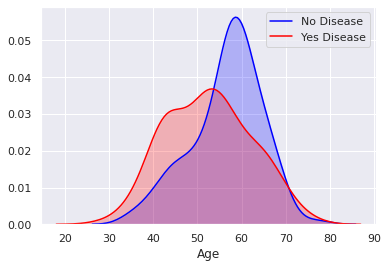

In [ ]:
sns.set(style='darkgrid')
sns.kdeplot(data=heart[heart['target']==0]['age'],shade=True,color='blue',label='No Disease')
sns.kdeplot(data=heart[heart['target']==1]['age'],shade=True,color='red',label='Yes Disease')
plt.xlabel("Age")


0 age
1 chol
2 trestbps
3 thalach


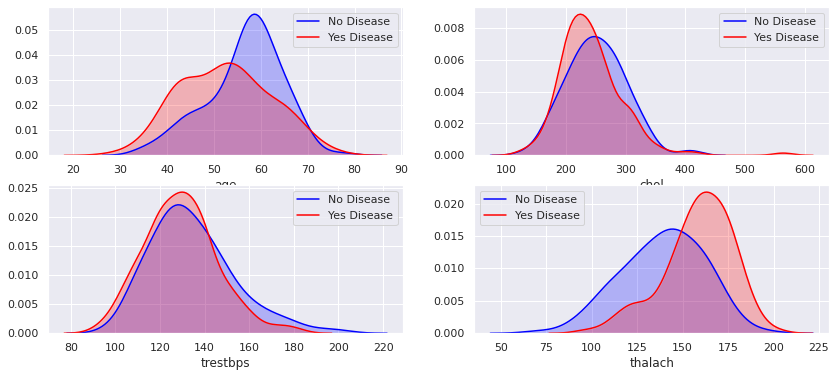

In [ ]:
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
ft_frame = heart.loc[:,['age','chol','trestbps','thalach']]
for i , column in enumerate(ft_frame):
  plt.subplot(2,2,i+1)
  print(i,column)
  sns.kdeplot(data=heart[heart['target']==0][column],shade=True,color='blue',label='No Disease')
  sns.kdeplot(data=heart[heart['target']==1][column],shade=True,color='red',label='Yes Disease')
  plt.xlabel(column)

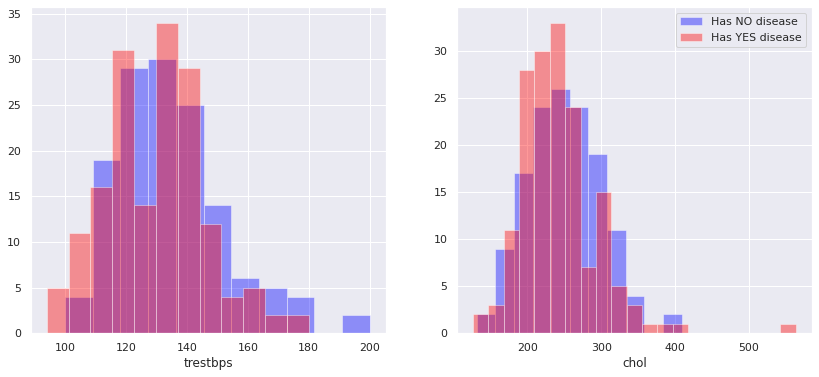

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(a=heart['trestbps'][heart['target']==0],color='blue',kde=False,label='Has NO disease')
sns.distplot(a=heart['trestbps'][heart['target']==1],color='red',kde=False,label='Has YES disease')

plt.subplot(1,2,2)
sns.distplot(a=heart['chol'][heart['target']==0],color='blue',kde=False,label='Has NO disease')
sns.distplot(a=heart['chol'][heart['target']==1],color='red',kde=False,label='Has YES disease')
plt.legend()


In [ ]:
categ_var = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dataset = pd.get_dummies(heart,columns=categ_var)
dataset.head()
dataset.shape

(303, 31)

In [ ]:
print(heart.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(heart,test_size=0.2)


#Train is 70% data of whole dataset
#Test is 30% data of whole dataset

X_train = train.drop('target',axis=1)
X_test = test.drop('target',axis=1)
y_train = train.target
y_test = test.target





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#print("cross validation accuracy is", accuracy_score(y_train, predicted)*100) 

Accuracy: 0.81 (+/- 0.18)


In [ ]:
pred = log_reg.predict(X_test)


0.8360655737704918


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

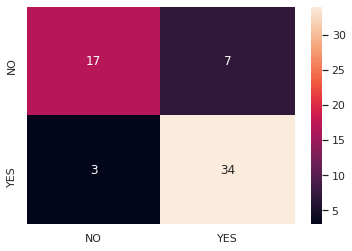

In [ ]:


cm = confusion_matrix(y_test,pred)
print(accuracy_score(y_test,pred))
cm_heatmap = sns.heatmap(data=cm,annot=True)
cm_heatmap.set_xticklabels(('NO','YES'))
cm_heatmap.set_yticklabels(('NO','YES'))